<a href="https://colab.research.google.com/github/spookyfish/intro_to_datascience/blob/master/notes/108_Image_Compression_and_the_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Already up to date.
(192, 168, 3)


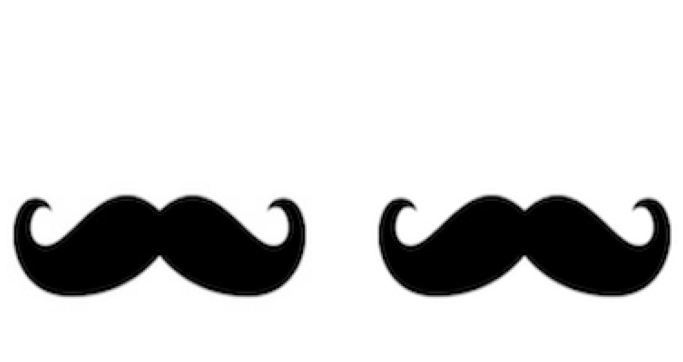

In [4]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

!git -C intro_to_datascience pull || git clone https://github.com/spookyfish/intro_to_datascience.git

A = imread(os.path.join('intro_to_datascience','data','mustache.jpg'))
print(A.shape)
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1, 2)

img = axs[0].imshow(A)
axs[0].axis('off')

img = axs[1].imshow(B)
img.set_cmap('gray')
axs[1].axis('off')

plt.show()

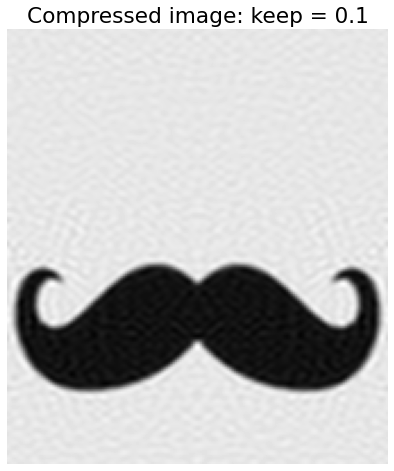

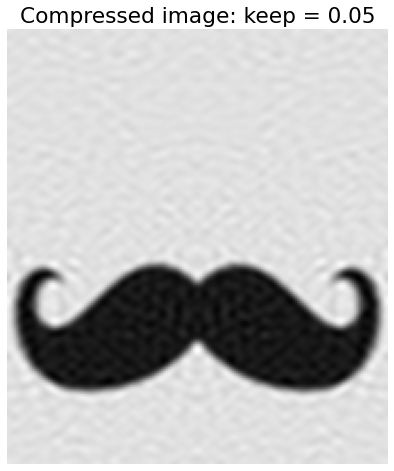

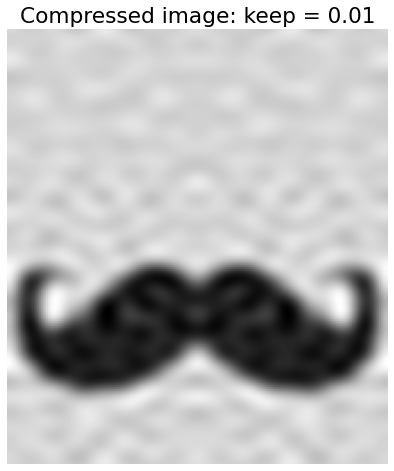

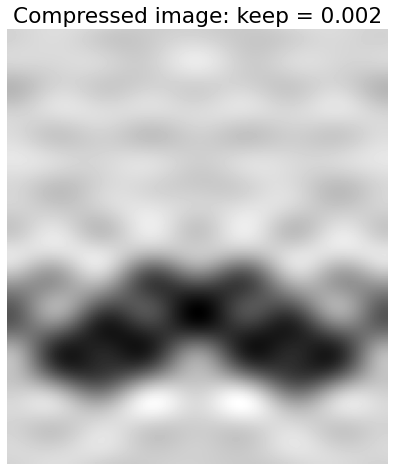

In [5]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Btlow = Bt * ind                 # Threshold small indices
    Blow = np.fft.ifft2(Btlow).real  # Compressed image
    plt.figure()
    plt.imshow(Blow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

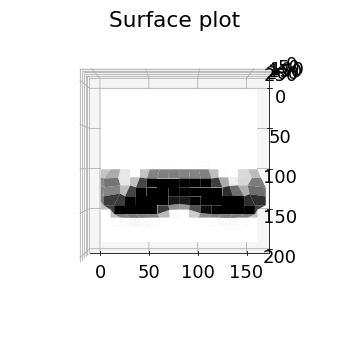

In [6]:
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, np.shape(B)[1] + 1), np.arange(1, np.shape(B)[0] + 1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], B[0::10, 0::10], cmap='gray')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(270,270)
plt.show()